In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import scipy as sp
from sklearn import preprocessing
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [2]:
box_score_totals_df = pd.read_csv("chicago_bulls_2019_2020.csv")

In [3]:
ml_df = box_score_totals_df.copy()

In [4]:
ml_df.head(5)

,MP,FG,FGA,FG%,3PA,3P,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Chicago Score,Opponent Score,W/L
0,240,36,87,0.414,8,35,0.229,24,28,0.857,8,29,37,20,10,3,15,22,104,124,0
1,240,34,91,0.374,16,39,0.410,22,25,0.880,13,28,41,23,7,7,20,16,106,125,0
2,240,44,86,0.512,17,41,0.415,23,31,0.742,7,47,54,27,4,6,24,21,128,129,0
3,240,38,87,0.437,15,36,0.417,24,32,0.750,5,32,37,26,7,1,14,23,115,107,1
4,240,50,92,0.543,14,36,0.389,19,25,0.760,9,35,44,34,9,3,15,27,133,130,1


In [5]:
normalized_ml_df = (ml_df-ml_df.min())/(ml_df.max()-ml_df.min())

In [6]:
normalized_ml_df.head(5)

,MP,FG,FGA,FG%,3PA,3P,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Chicago Score,Opponent Score,W/L
0,0.0,0.136364,0.40,0.254753,0.15,0.52,0.177083,0.869565,0.807692,0.761667,0.352941,0.052632,0.08,0.20,0.666667,0.3,0.500000,0.647059,0.325581,0.844444,0.0
1,0.0,0.045455,0.56,0.102662,0.55,0.68,0.648437,0.782609,0.692308,0.800000,0.647059,0.000000,0.24,0.35,0.416667,0.7,0.777778,0.294118,0.372093,0.866667,0.0
2,0.0,0.500000,0.36,0.627376,0.60,0.76,0.661458,0.826087,0.923077,0.570000,0.294118,1.000000,0.76,0.55,0.166667,0.6,1.000000,0.588235,0.883721,0.955556,0.0
3,0.0,0.227273,0.40,0.342205,0.50,0.56,0.666667,0.869565,0.961538,0.583333,0.176471,0.210526,0.08,0.50,0.416667,0.1,0.444444,0.705882,0.581395,0.466667,1.0
4,0.0,0.772727,0.60,0.745247,0.45,0.56,0.593750,0.652174,0.692308,0.600000,0.411765,0.368421,0.36,0.90,0.583333,0.3,0.500000,0.941176,1.000000,0.977778,1.0


In [7]:
target = normalized_ml_df.iloc[0:,-1] #set target equal to Win/Loss column

In [8]:
initial_features_df = normalized_ml_df.iloc[0:,0:18]

In [9]:
initial_features_df.head()

,MP,FG,FGA,FG%,3PA,3P,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,0.0,0.136364,0.40,0.254753,0.15,0.52,0.177083,0.869565,0.807692,0.761667,0.352941,0.052632,0.08,0.20,0.666667,0.3,0.500000,0.647059
1,0.0,0.045455,0.56,0.102662,0.55,0.68,0.648437,0.782609,0.692308,0.800000,0.647059,0.000000,0.24,0.35,0.416667,0.7,0.777778,0.294118
2,0.0,0.500000,0.36,0.627376,0.60,0.76,0.661458,0.826087,0.923077,0.570000,0.294118,1.000000,0.76,0.55,0.166667,0.6,1.000000,0.588235
3,0.0,0.227273,0.40,0.342205,0.50,0.56,0.666667,0.869565,0.961538,0.583333,0.176471,0.210526,0.08,0.50,0.416667,0.1,0.444444,0.705882
4,0.0,0.772727,0.60,0.745247,0.45,0.56,0.593750,0.652174,0.692308,0.600000,0.411765,0.368421,0.36,0.90,0.583333,0.3,0.500000,0.941176


In [10]:
corr_matrix = initial_features_df.corr(method="pearson")
print("Pearson correlation coefficient:")

Pearson correlation coefficient:


In [11]:
corr_matrix.head()

,MP,FG,FGA,FG%,3PA,3P,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
MP,1.000000,0.280626,0.225204,0.122820,0.158771,0.031320,0.195625,0.132072,0.163193,-0.041738,-0.009068,0.268476,0.217331,0.071021,0.028905,0.003054,0.326692,0.131844
FG,0.280626,1.000000,0.187566,0.812851,0.269536,0.033137,0.375106,-0.076225,-0.067517,-0.064789,-0.111150,0.085906,0.008253,0.541175,0.098819,0.198001,-0.040270,0.032015
FGA,0.225204,0.187566,1.000000,-0.415297,0.007300,0.263121,-0.176342,0.095260,0.037269,0.141992,0.730437,0.003586,0.416528,-0.049102,0.173097,0.088105,-0.339590,0.045376
FG%,0.122820,0.812851,-0.415297,1.000000,0.257132,-0.116388,0.462005,-0.126135,-0.085796,-0.136420,-0.527678,0.081140,-0.231524,0.538993,-0.031911,0.132430,0.156072,-0.005415
3PA,0.158771,0.269536,0.007300,0.257132,1.000000,0.740145,0.836482,-0.110213,-0.140301,0.023211,0.040370,0.161824,0.156947,0.308113,-0.216870,0.179122,0.261671,-0.011153


In [12]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

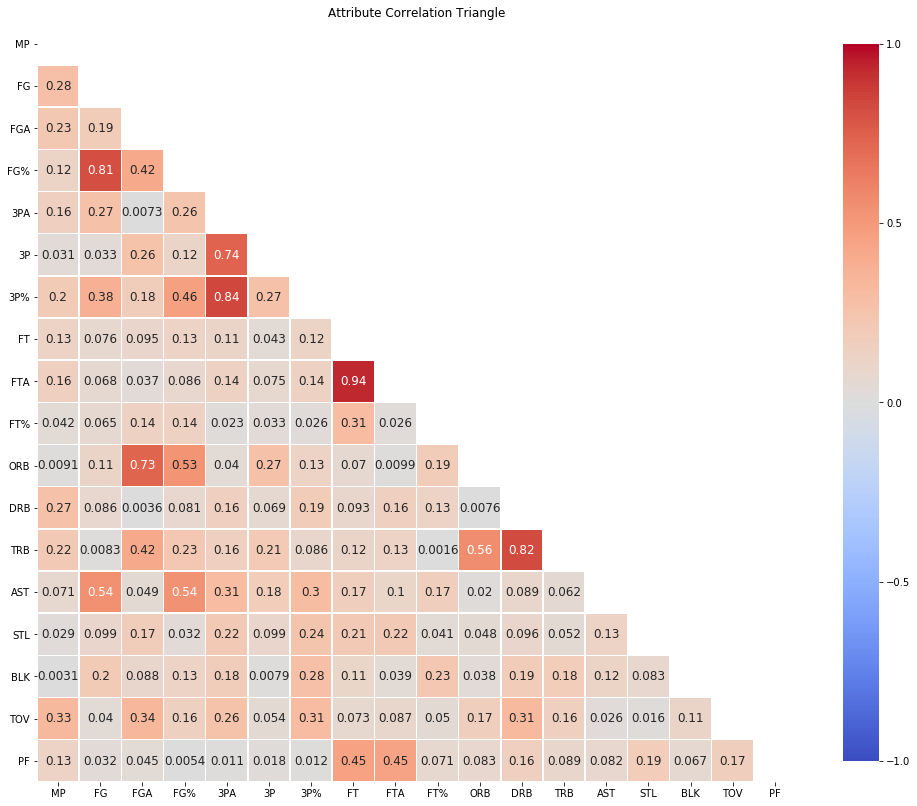

In [13]:
f, ax = plt.subplots(figsize=(17, 22)) 
heatmap = sns.heatmap(abs(corr_matrix), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .6, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
ax.set_title("Attribute Correlation Triangle")
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#### Notice how DRB and TRB are correlated with about 0.824296 pearson R. This is likely caused by the fact that DRB is "Defensive Rebounds" and TRB is "Total Rebounds". So, to get a defensive rebound is to increase your total rebounds by 1 as well. As such, I'll eliminate TRB from the dataset since this added attribute really won't help classify wins/losses. 
#### Additionally, FT and FTA are very closely correlated. Again, this makes sense since "Free Throws (made)" and "Free Throws Attempted" go close together. Again, I will eliminate "Free Throws Attempted" as it does not add much towards classifying wins/losses.
#### Next 3P% and 3PA are also strongly correlated. Yet again, 3PA = 3 Pointers Attempted and 3P% = 3 Pointer Percentage Made. So, it is no surprise that those two variables are closely correlated. Again, I will remove 3P% and keepe 3PA in the dataset.
#### Similarly to 3P% and 3PA, FG (Field Goals Attempted) and FG% (Field Goal Percentage) are closey correrelated. As in the previous case, I will remove FG% from the dataset.

In [14]:
features_df = initial_features_df.drop(columns=["TRB","FTA","3P%","FG%"])

In [15]:
features_df.head()

,MP,FG,FGA,3PA,3P,FT,FT%,ORB,DRB,AST,STL,BLK,TOV,PF
0,0.0,0.136364,0.40,0.15,0.52,0.869565,0.761667,0.352941,0.052632,0.20,0.666667,0.3,0.500000,0.647059
1,0.0,0.045455,0.56,0.55,0.68,0.782609,0.800000,0.647059,0.000000,0.35,0.416667,0.7,0.777778,0.294118
2,0.0,0.500000,0.36,0.60,0.76,0.826087,0.570000,0.294118,1.000000,0.55,0.166667,0.6,1.000000,0.588235
3,0.0,0.227273,0.40,0.50,0.56,0.869565,0.583333,0.176471,0.210526,0.50,0.416667,0.1,0.444444,0.705882
4,0.0,0.772727,0.60,0.45,0.56,0.652174,0.600000,0.411765,0.368421,0.90,0.583333,0.3,0.500000,0.941176


In [16]:
#Use 3 folds.
#cv = KFold(n_splits=3, random_state=1, shuffle=True)

### Parameters for Random Forest Explanation:

In [17]:

i=0
#Random Forest Model Initialization
rf_accuracy_scores = []
rf_confusion_matrices = []
rf_f1_scores = []
rf_classifier = RandomForestClassifier(n_estimators = 100,max_depth = None,min_samples_split = 3,class_weight ="balanced") 

#Run models each 100x to achieve a closer-to-actual accuracy score
while i < 101:
    #initialize test and train 
    rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(features_df, target, test_size = 0.20)
    
    #Random Forest code
    rf_classifier.fit(rf_X_train, rf_y_train)
    rf_y_pred = rf_classifier.predict(rf_X_test)

    #accuracy
    rf_acc = accuracy_score(rf_y_test,rf_y_pred)
    rf_accuracy_scores.append(rf_acc)
    #rf_acc = cross_val_score(rf_classifier, rf_X_train, rf_y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    #rf_accuracy_scores.append(rf_acc)

    #F1-Score
    rf_f1_score = f1_score(rf_y_test, rf_y_pred, zero_division=1)
    rf_f1_scores.append(rf_f1_score)
    
    #confusion matrix
    rf_conf_matrix = confusion_matrix(rf_y_test, rf_y_pred)
    rf_confusion_matrices.append(rf_conf_matrix)
    i +=1


### Parameters for Logistic Regression Explanation:
#### Let class_weight ="balanced" due to the amount of losses being greater than the number of wins for the Chicago Bulls basketball season. Lasso regression performs better than ridge for my dataset, so I will set penality='l2' (lasso).


In [18]:
#Logistic Regression Model Intialization
lr_accuracy_scores = []
lr_f1_scores = []
lr_confusion_matrices = []
logistic_reg_model = LogisticRegression(penalty='l2',solver='saga',dual=False, class_weight='balanced',C=4,random_state=None)
j=0
while j < 101:
    lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(features_df, target, test_size = 0.20)
    #logistic reg code
    logistic_reg_model.fit(lr_X_train,lr_y_train)
    lr_y_pred=logistic_reg_model.predict(lr_X_test)
    #accuracy
    lr_acc = accuracy_score(lr_y_test,lr_y_pred)
    lr_accuracy_scores.append(lr_acc)
    #lr_acc = cross_val_score(logistic_reg_model, lr_X_train, lr_y_train, scoring='accuracy', cv=cv, n_jobs=-1)
   #lr_accuracy_scores.append(lr_acc)
    
    #F1-Score
    lr_f1_score = f1_score(lr_y_test, lr_y_pred, zero_division=1)
    lr_f1_scores.append(lr_f1_score)
    
    #confusion Matrix
    lr_conf_matrix = confusion_matrix(lr_y_test, lr_y_pred)
    lr_confusion_matrices.append(lr_conf_matrix)
    j+=1
    

C:\Users\joelf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\joelf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\joelf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\joelf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\joelf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\joelf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\joelf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\joelf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\joelf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\joelf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\joelf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\joelf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Random Forest Results

In [19]:
print(np.mean(rf_accuracy_scores))

0.6554455445544554


In [20]:
print(np.mean(rf_f1_scores))

0.5495123623545288


In [21]:
print("TP   FN\nFP   TN")
print(np.mean(rf_confusion_matrices, axis=0))

TP   FN
FP   TN
[[6.5049505  2.02970297]
 [3.13861386 3.32673267]]


### Logistic Regression Results

In [22]:
print(np.mean(lr_accuracy_scores))

0.7590759075907589


In [23]:
print(np.mean(lr_f1_scores))

0.7136886208438487


In [24]:
print("TP   FN\nFP   TN")
print(np.mean(lr_confusion_matrices, axis=0))

TP   FN
FP   TN
[[6.52475248 2.12871287]
 [1.48514851 4.86138614]]
